In [45]:
import cv2
import pandas as pd
import pickle

def convert_bounding_boxes_2(t, l, b, r):
    x = l
    y = t
    width = np.abs(r-l)
    height = np.abs(t-b)
    return x,y, width, height

with open('../data/val_data.pkl', 'rb') as outp:
    val_data = pickle.load(outp)
    
val_data[val_data["product_id"]== 103031217]

,product_id,image_h,image_w,num_boxes,query,query_id,boxes_convert,feature_convert,labels_convert,label_words,pos
2,103031217,488,750,2,breathable and comfortable children's shoes,0,"[[198.0, 45.0, 423.0, 472.0], [52.0, 362.0, 41...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[4, 4]",shoes###shoes,"[[0.264, 0.564, 0.09221311475409837, 0.9672131..."


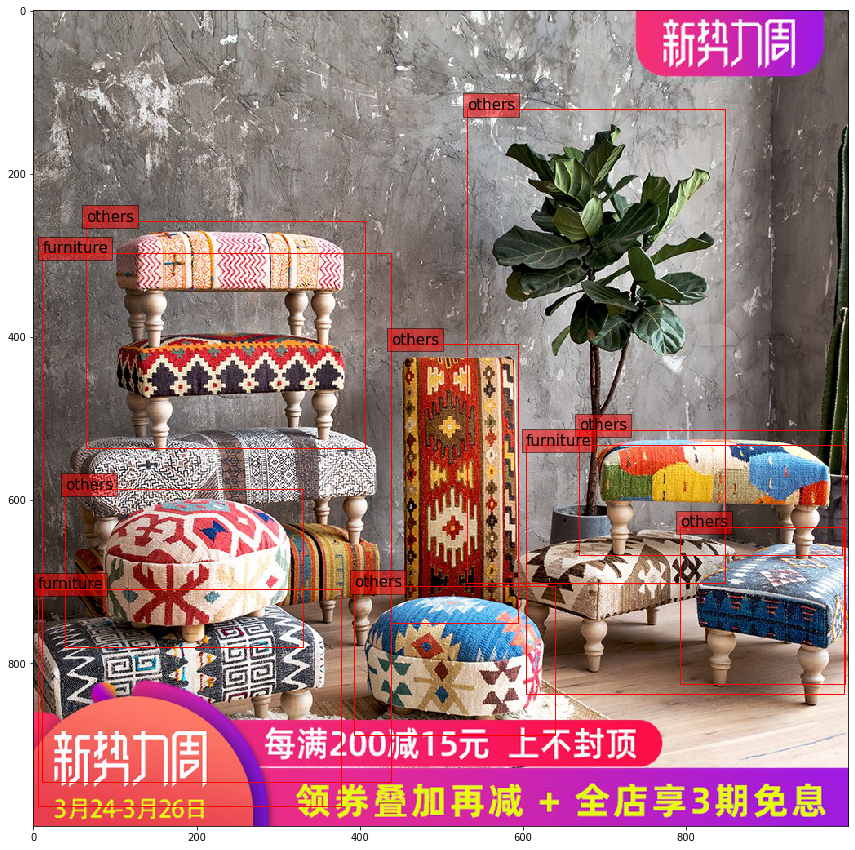

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

image_name = val_data.sample().product_id.values[0]
fig_size=(15, 15)
data = val_data[val_data["product_id"] == image_name]


image_h = data["image_h"].values[0]
image_w = data["image_w"].values[0]
boxes = data["boxes_convert"].values[0].tolist()
labels = data["label_words"].values[0].split("###")

img_path = '/Users/chaupham/minhchau/jupyter_projects/KDD_Track1_Task1/data/multimodal_validpics/{}.jpg'.format(image_name)


im = Image.open(img_path)
im.thumbnail((image_h, image_w), Image.ANTIALIAS)

im = np.array(im, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots( figsize=fig_size) 

# Display the image
ax.imshow(im)

# Create a Rectangle patch
for box, label in zip(boxes, labels):
    x,y,w,h=convert_bounding_boxes_2(*box)
    rect = patches.Rectangle((x,y), w, h , linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.text(x, y,label, bbox=dict(facecolor='red', alpha=0.5), fontsize=15)

plt.savefig('foo.png', bbox_inches='tight')


In [54]:
plt.show()